In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import logging
import gc


In [22]:
import os
import logging
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Layer, Reshape, InputLayer
import tqdm.notebook as tq
import time

In [3]:
from alibi_detect.models.tensorflow.losses import elbo
from alibi_detect.od import OutlierVAE
from alibi_detect.utils.fetching import fetch_detector
from alibi_detect.utils.perturbation import apply_mask
from alibi_detect.utils.saving import save_detector, load_detector
from alibi_detect.utils.visualize import plot_instance_score, plot_feature_outlier_image

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
filepath = './saves/'
detector_name = 'outlierdetector_4_80272'

In [5]:
od = load_detector(filepath=os.path.join(filepath, detector_name))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255)

datagen_inliers = datagen.flow_from_directory(
    '../Data/InternalTest/inliers/',
    target_size=(480, 752), batch_size=8,
    shuffle=True, 
)

Found 138398 images belonging to 2 classes.


In [7]:
datagen_outliers = datagen.flow_from_directory(
    '../Data/InternalTest/outliers/',
    target_size=(480, 752), batch_size=8,
    shuffle=True, 
)

Found 1000 images belonging to 2 classes.


In [8]:
outlier_scores = []

In [9]:
for _ in tq.tqdm(range(len(datagen_inliers))):
    gc.collect()
    imgs = datagen_inliers.next()
    img_train = imgs[0]
    od_preds = od.predict(img_train,
                  outlier_type='instance',    # use 'feature' or 'instance' level
                  # return_feature_score=True,  # scores used to determine outliers
                  return_instance_score=True)
    for x in od_preds['data']['instance_score']: 
        outlier_scores.append(x)
        



22103it [7:58:18,  1.31s/it]                                                                                           

KeyboardInterrupt: 

In [17]:


outlier_scores = []
for _ in tq.tqdm(range(len(datagen_outliers))):
    gc.collect()
    imgs = datagen_inliers.next()
    img_train = imgs[0]
    od_preds = od.predict(img_train,
                  outlier_type='instance',    # use 'feature' or 'instance' level
                  # return_feature_score=True,  # scores used to determine outliers
                  return_instance_score=True)
    for x in od_preds['data']['instance_score']: 
        outlier_scores.append(x)

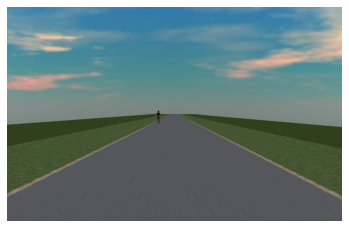

In [35]:
plt.imshow(img)
plt.axis('off')
plt.show()

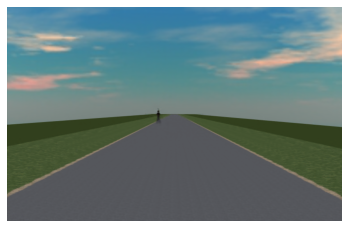

In [36]:
plt.imshow(recon)
plt.axis('off')
plt.show()

In [46]:
f = od.feature_score(img, recon)
i = od.instance_score(f)

In [48]:
i.shape

(240,)

In [63]:
od_preds = od.predict(img_train,
                      outlier_type='instance',    # use 'feature' or 'instance' level
                      # return_feature_score=True,  # scores used to determine outliers
                      return_instance_score=True)

In [58]:
od_preds['data'].keys()

dict_keys(['instance_score', 'feature_score', 'is_outlier'])

In [61]:
od_preds['data']['feature_score'].shape

(8, 480, 752, 3)

In [62]:
np.percentile(od_preds['data']['instance_score'], 0.9)

# update threshold
threshold = np.percentile(outlier_score, threshold_perc)

2.9016237745963736e-05

In [15]:
len(inlier_scores)

176822

In [13]:
inlier_scores = outlier_scores

In [32]:
all_scores = inlier_scores + outlier_scores

In [40]:
threshold = np.percentile(all_scores, 0.99)
print(threshold)

2.7307908359216527e-05


In [34]:
np.percentile(all_scores, len(outlier_scores)/len(all_scores))

2.6377532754582757e-05

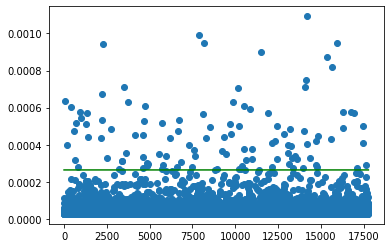

In [56]:
plt.plot(all_scores[::10], marker='o', linestyle='', ms=6)
plt.plot(np.arange(len(all_scores[::10])), np.ones(len(all_scores[::10])) * 0.0002637, color='g', label='Threshold')

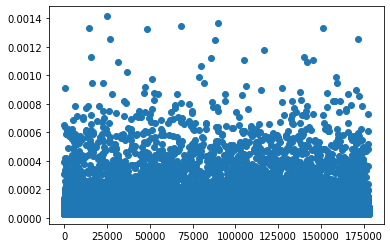

In [58]:
plt.plot(A, 'o')

In [78]:
np.sum(A>2.6388002440762648e-04)

1164

In [67]:
1746/len(A)

0.00981880757161656

In [74]:
np.percentile(A, 0.01, method='linear')

2.6388002440762648e-05

In [71]:
(A * 1).shape

(177822,)